In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_ads = pd.read_csv("../../datasets/ads/Advertising.csv")
data_ads.iloc[0:4]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5


In [3]:
data_ads.shape

(200, 4)

In [4]:
data_ads["Corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [5]:
data_ads["Corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"])) ** 2

In [6]:
data_ads["Corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"])) ** 2

In [7]:
corr_pearson = sum(data_ads["Corrn"])/np.sqrt(sum(data_ads["Corr1"]*sum(data_ads["Corr2"])))

In [8]:
data_ads = data_ads.drop(["Corrn","Corr1","Corr2"], axis = 1)

In [9]:
def corrcoef(df, var1, var2):
    df["Corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["Corr1"] = (df[var1] - np.mean(df[var1])) ** 2
    df["Corr2"] = (df[var2] - np.mean(df[var2])) ** 2
    corr_p = sum(df["Corrn"])/np.sqrt(sum(df["Corr1"]*sum(df["Corr2"])))
    df = df.drop(["Corrn","Corr1","Corr2"], axis = 1, inplace = True)
    return corr_p

In [10]:
corrcoef(data_ads,"TV","Sales")

0.7822244248616065

In [11]:
for i in data_ads.columns:
    for j in data_ads.columns:
        if data_ads.columns.tolist().index(i) < data_ads.columns.tolist().index(j):
            print("Correlación entre",i,"y", j,
                  ":",round(corrcoef(data_ads,i,j),6))  

Correlación entre TV y Radio : 0.054809
Correlación entre TV y Newspaper : 0.056648
Correlación entre TV y Sales : 0.782224
Correlación entre Radio y Newspaper : 0.354104
Correlación entre Radio y Sales : 0.576223
Correlación entre Newspaper y Sales : 0.228299


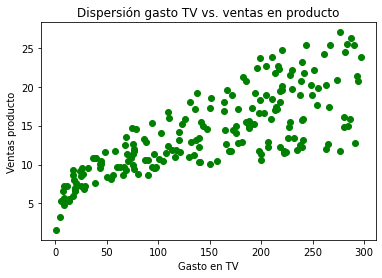

In [12]:
plt.scatter(data_ads["TV"],data_ads["Sales"], color = "green")
plt.xlabel("Gasto en TV")
plt.ylabel("Ventas producto")
plt.title("Dispersión gasto TV vs. ventas en producto")
plt.show()

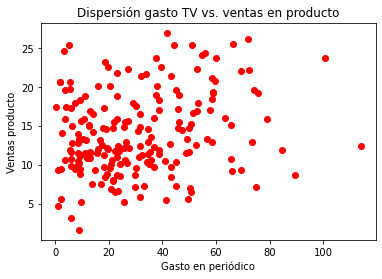

In [13]:
plt.scatter(data_ads["Newspaper"],data_ads["Sales"], color = "red")
plt.xlabel("Gasto en periódico")
plt.ylabel("Ventas producto")
plt.title("Dispersión gasto TV vs. ventas en producto")
plt.show()

In [14]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


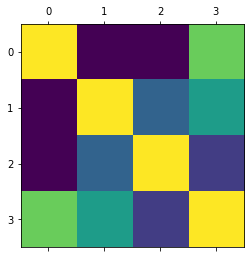

In [15]:
plt.matshow(data_ads.corr())
plt.show()